In [166]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [152]:
mu = 5
N = 3
alpha = 0.01
gamma = 1
epochs = 200
p = 0.8
np.random.seed(0)
P = {
    0:{0: (0, 0, True)}, #state:{action: (reward, next state, terminal)}
    1:{0: (mu, 0, True),
       1: (mu, 0, True),
       2: (mu, 0, True),
       3: (mu, 0, True),
       4: (mu, 0, True),
       5: (mu, 0, True),
       6: (mu, 0, True),
       7: (mu, 0, True)}, 
    2:{0: (0, 1, False),
       1: (0, 0, True)}
}

In [153]:
def rewardnstate(a, s):
    r, state, terminal = P[s][a]
    if s==1:
        r = r + np.random.uniform(-1, 1)
    return r, state, terminal

def act_functn(Q, state, state_visits, nAfes):
    #eps = 0.2
    #eps = 1/np.power(state_visits[state], 0.2)
    eps = 1/np.sqrt(state_visits[state])
    if np.random.choice([True, False], p=[1-eps, eps]):
        action = np.argmax(Q[state, :nAfes[state]])
    else:
        action = np.random.choice(nAfes[state])
    return action

return_dict = {
            0: {0: []},
            1: {
                0: [],
                1: [], 
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: []
            },
            2: {
                0: [],
                1: []
            }
        }

In [238]:
def train(epochs, gamma, rewardnstate, act_functn, P, seed=1, alpha=0.05, return_dict = return_dict):
    def double_Qlearning(Qa, Qb, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
        Qa[state, action] += alpha_a*(reward + gamma*Qb[next_state, action_star] - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    def Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        Qa[state, action] += alpha_a*(reward + gamma*np.max(Qa[next_state, :nAfes[next_state]]) - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    np.random.seed(seed)
    nS = 3
    nA = 8
    gamma = 1
    count_matrix_a = np.ones([nS, nA])
    count_matrix_b = np.ones([nS, nA])
    state_visits = np.ones(nS)
    maximal_value_a = []
    maximal_value_b = []
    maximal_value = []
    pref_list = []
    pref_learning_list = []
    cumsum = 0
    count = 0
    Qa = np.random.rand(nS, nA)
    Qb = np.random.rand(nS, nA)
    Qa[0] = 0
    Qb[0] = 0
    print("Qa", Qa)
    nAfes = [1, 8, 2] #num_Actions_for_each_state
    start_state = 2
    for i in range(epochs):
        reward_list = []
        state = start_state#state = np.random.choice(nS)
        terminal = True if state==0 else False
        while not terminal:
            if np.random.choice([True, False]):
                action = act_functn(Qa, state, state_visits, nAfes)
                try:
                    stat.variance(return_dict[state][action])
                    x = True
                except:
                    x = False
                if(x):
                    if(stat.variance(return_dict[state][action])<0.4):
                        reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = double_Qlearning(Qa, Qb, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(1)
                    else:
                        reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(0)
                else:
                    reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                    pref_learning_list.append(0)

            else:
                action = act_functn(Qb, state, state_visits, nAfes)
                try:
                    stat.variance(return_dict[state][action])
                    x = True
                except:
                    x = False
                if(x):
                    if(stat.variance(return_dict[state][action])<0.4):
                        reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = double_Qlearning(Qb, Qa, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(1)
                    else:
                        reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = Qlearning(Qb, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(0)
                else:
                    reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = Qlearning(Qb, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)

                    pref_learning_list.append(0)


            state = next_state
            reward_sum = 0
            for i in range(len(reward_list)-1, -1, -1):
                reward_sum = gamma*reward_sum + reward_list[i][2]
                return_dict[reward_list[i][0]][reward_list[i][1]].append(reward_sum)

        pref = .0
        pref += Qa[2][0] - Qa[2][1] #preference of left over right
        pref += Qb[2][0] - Qb[2][1] #preference of left over right
        pref /= float(2)
        pref_list.append(pref)
        reward_list.append(cumsum/count)
    return pref_list, pref_learning_list, Qa, Qb, maximal_value_a, maximal_value_b, maximal_value

In [ ]:
def train(epochs, gamma, rewardnstate, act_functn, P, seed=1, alpha=0.05, return_dict = return_dict):
    def double_Qlearning(Qa, Qb, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
        Qa[state, action] += alpha_a*(reward + gamma*Qb[next_state, action_star] - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    def Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits):
        reward, next_state, terminal = rewardnstate(action, state)
        cumsum += reward
        count += 1
        alpha_a = 1/np.power(count_matrix_a[state, action], p)
        Qa[state, action] += alpha_a*(reward + gamma*np.max(Qa[next_state, :nAfes[next_state]]) - Qa[state, action])
        count_matrix_a[state, action] += 1
        state_visits[state] += 1
        maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
        maximal_value.append(np.max(Qa[start_state, :nAfes[start_state]]))
        reward_list.append((state, action, reward))
        return reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count
    
    np.random.seed(seed)
    nS = 3
    nA = 8
    gamma = 1
    count_matrix_a = np.ones([nS, nA])
    count_matrix_b = np.ones([nS, nA])
    state_visits = np.ones(nS)
    maximal_value_a = []
    maximal_value_b = []
    maximal_value = []
    pref_list = []
    pref_learning_list = []
    cumsum = 0
    count = 0
    Qa = np.random.rand(nS, nA)
    Qb = np.random.rand(nS, nA)
    Qa[0] = 0
    Qb[0] = 0
    print("Qa", Qa)
    nAfes = [1, 8, 2] #num_Actions_for_each_state
    start_state = 2
    for i in range(epochs):
        reward_list = []
        state = start_state#state = np.random.choice(nS)
        terminal = True if state==0 else False
        if np.random.choice([True, False]):
            action = act_functn(Qa, state, state_visits, nAfes)
        else:
            action = act_functn(Qa, state, state_visits, nAfes)
        while not terminal:
            if np.random.choice([True, False]):
                action = act_functn(Qa, state, state_visits, nAfes)
                try:
                    stat.variance(return_dict[state][action])
                    x = True
                except:
                    x = False
                if(x):
                    if(stat.variance(return_dict[state][action])<0.4):
                        reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = double_Qlearning(Qa, Qb, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(1)
                    else:
                        reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(0)
                else:
                    reward_list, maximal_value_a, maximal_value, state_visits, count_matrix_a, Qa, next_state, terminal, cumsum, count = Qlearning(Qa, cumsum, count, count_matrix_a, maximal_value_a, rewardnstate, action, state, reward_list, state_visits)
                    pref_learning_list.append(0)

            else:
                action = act_functn(Qb, state, state_visits, nAfes)
                try:
                    stat.variance(return_dict[state][action])
                    x = True
                except:
                    x = False
                if(x):
                    if(stat.variance(return_dict[state][action])<0.4):
                        reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = double_Qlearning(Qb, Qa, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(1)
                    else:
                        reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = Qlearning(Qb, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)
                        pref_learning_list.append(0)
                else:
                    reward_list, maximal_value_b, maximal_value, state_visits, count_matrix_b, Qb, next_state, terminal, cumsum, count = Qlearning(Qb, cumsum, count, count_matrix_b, maximal_value_b, rewardnstate, action, state, reward_list, state_visits)

                    pref_learning_list.append(0)


            state = next_state
            reward_sum = 0
            for i in range(len(reward_list)-1, -1, -1):
                reward_sum = gamma*reward_sum + reward_list[i][2]
                return_dict[reward_list[i][0]][reward_list[i][1]].append(reward_sum)

        pref = .0
        pref += Qa[2][0] - Qa[2][1] #preference of left over right
        pref += Qb[2][0] - Qb[2][1] #preference of left over right
        pref /= float(2)
        pref_list.append(pref)
        reward_list.append(cumsum/count)
    return pref_list, pref_learning_list, Qa, Qb, maximal_value_a, maximal_value_b, maximal_value

In [239]:
pref_list, pref_learning_list, Qa, Qb, maximal_value_a, maximal_value_b, maximal_value = train(epochs, gamma, rewardnstate, act_functn, P)

Qa [[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.39676747 0.53881673 0.41919451 0.6852195  0.20445225 0.87811744
  0.02738759 0.67046751]
 [0.4173048  0.55868983 0.14038694 0.19810149 0.80074457 0.96826158
  0.31342418 0.69232262]]


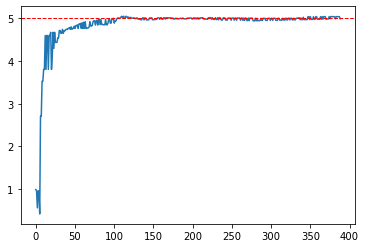

In [235]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.plot(maximal_value)
plt.axhline(y = max(mu, 0), color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value[-1], 4), xy=(50000, maximal_value[-1]), xytext=(100000, 5), arrowprops = props)
plt.show()

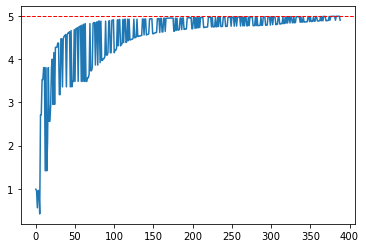

In [172]:
props = {
    "width": 1,
    "headwidth": 10
}
plt.plot(maximal_value)
plt.axhline(y = max(mu, 0), color = "r", linestyle = "--", linewidth = 1)
#plt.annotate('y = %s' % round(maximal_value[-1], 4), xy=(50000, maximal_value[-1]), xytext=(100000, 5), arrowprops = props)
plt.show()

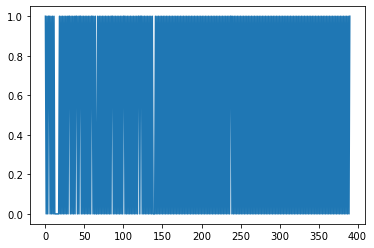

In [148]:
plt.plot(pref_learning_list)
plt.show()

In [70]:
return_dict

{0: {0: []},
 1: {0: [4.0999069178921745,
   5.142017122370185,
   4.855625265184644,
   4.292065491976457,
   5.067306689942423],
  1: [4.529839115325618,
   5.785777417050303,
   5.8372035559550515,
   5.173666681312166,
   5.396114496894606,
   5.3693758129860445,
   4.063912449479077,
   4.08854459999519,
   4.146246622330148,
   5.248673404805352,
   5.722423276733589,
   4.436200366965823,
   4.306426831550871],
  2: [4.597860224419432,
   4.996218139256473,
   4.031642485693112,
   4.7356864812768595,
   5.874380648800013,
   4.07199887275274,
   4.7216295088544555,
   4.323237049511514,
   4.420348019829679,
   5.609509127486691,
   5.456023286805539,
   4.795222564789297,
   4.919090568244013,
   4.047768189093356,
   5.154135261263234,
   5.807758530157388,
   4.385925464038226,
   4.4673322784785,
   4.400417992797586,
   5.976129364245054,
   5.708230887673078,
   5.220481625293259,
   5.980943567247682,
   4.406115695743456,
   4.916301747496503,
   4.960125858946773,
   5

In [13]:
#             if():
#                 if np.random.choice([True, False]):
#                     action = act_functn(Qa, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#                     alpha_a = 1/np.power(count_matrix_a[state, action], p)
#                     action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
#                     Qa[state, action] += alpha_a*(reward + gamma*Qb[next_state, action_star] - Qa[state, action])
#                     count_matrix_a[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
#                 else:
#                     action = act_functn(Qb, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#                     action_star = np.argmax(Qb[next_state, :nAfes[next_state]])
#                     alpha_b = 1/np.power(count_matrix_b[state, action], p)
#                     Qb[state, action] += alpha_b*(reward + gamma*Qa[next_state, action_star] - Qb[state, action])
#                     count_matrix_b[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_b.append(np.max(Qb[start_state, :nAfes[start_state]]))
#             else:
#                 if np.random.choice([True, False]):
#                     action = act_functn(Qa, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#                     alpha_a = 1/np.power(count_matrix_a[state, action], p)
#         #             action_star = np.argmax(Qa[next_state, :nAfes[next_state]])
#                     Qa[state, action] += alpha_a*(reward + gamma*np.max(Qa[next_state, :nAfes[next_state]]) - Qa[state, action])
#                     count_matrix_a[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_a.append(np.max(Qa[start_state, :nAfes[start_state]]))
#                 else:
#                     action = act_functn(Qb, state, state_visits)
#                     reward, next_state, terminal = rewardnstate(action, state)
#                     cumsum += reward
#                     count += 1
#     #                 action_star = np.argmax(Qb[next_state, :nAfes[next_state]])
#                     alpha_b = 1/np.power(count_matrix_b[state, action], p)
#                     Qb[state, action] += alpha_b*(reward + gamma*np.max(Qb[next_state, :nAfes[next_state]]) - Qb[state, action])
#                     count_matrix_b[state, action] += 1
#                     state_visits[state] += 1
#                     maximal_value_b.append(np.max(Qb[start_state, :nAfes[start_state]]))

In [89]:
def f():
    print(3)

In [90]:
a = 2
def h(a):
    
    f()
    print(a)

In [91]:
h(a)

3
2
